# **Phase 3: Week 3 - Model Training and Customer Segmentation**
Objectives:
● Model Training: Implement the chosen clustering algorithm and train the model using the preprocessed data.

● Cluster Assignment: Assign customers to clusters based on the clustering results.

● Visualization: Visualize the customer segments using appropriate techniques (e.g., scatterplots, dendrograms).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Will read both the Train and Test dataset.

From Week 2 after trying different algorithms for the entire dataset and also for numerical features, it has clear that algorithms perform differently with noise and the clusters formed are not well separated.

DBSCAN although provided good silhouette score, it wasnt performing well with Test Dataset.

Hence for week 3, I have considered only the numerical data of both the datasets to perform clustering. They say it does not make sense to use all the variables, instead use only the numerical features.

Kmeans Clustering with PCA has been used for cluster analysis for both Train and Test Dataset.

In [2]:
dtrain= pd.read_csv('/content/Train.csv')

In [3]:
dtest=pd.read_csv('/content/Test.csv')

In [4]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [5]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [6]:
dtrain.drop('id',axis=1,inplace=True)
dtest.drop('id',axis=1,inplace=True)

In [7]:
numerical=dtrain.select_dtypes(include=np.number)
numerical.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

In [8]:
numerical_test=dtest.select_dtypes(include=np.number)
numerical_test.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign'],
      dtype='object')

In [9]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31028 non-null  float64
 1   balance                           31248 non-null  float64
 2   day_of_month                      31647 non-null  int64  
 3   last_contact_duration             31336 non-null  float64
 4   num_contacts_in_campaign          31535 non-null  float64
 5   days_since_prev_campaign_contact  5816 non-null   float64
 6   num_contacts_prev_campaign        31647 non-null  int64  
 7   term_deposit_subscribed           31647 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.9 MB


In [10]:
numerical_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      13294 non-null  float64
 1   balance                           13383 non-null  float64
 2   day_of_month                      13564 non-null  int64  
 3   last_contact_duration             13442 non-null  float64
 4   num_contacts_in_campaign          13519 non-null  float64
 5   days_since_prev_campaign_contact  2441 non-null   float64
 6   num_contacts_prev_campaign        13564 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 741.9 KB


In [11]:
numerical.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,26,303.0,4.0,NaN,0,0
1,34.0,934.0,18,143.0,2.0,132.0,1,0
2,46.0,656.0,5,101.0,4.0,NaN,0,0
3,34.0,2.0,20,127.0,3.0,NaN,0,0
4,41.0,1352.0,13,49.0,2.0,NaN,0,0


In [12]:
numerical_test.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
0,55.0,7136.0,13,90.0,2.0,NaN,0
1,24.0,179.0,18,63.0,2.0,NaN,0
2,46.0,143.0,8,208.0,1.0,NaN,0
3,56.0,6023.0,6,34.0,1.0,NaN,0
4,62.0,2913.0,12,127.0,1.0,188.0,1


In [13]:
numerical.isnull().sum()

customer_age                          619
balance                               399
day_of_month                            0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
term_deposit_subscribed                 0
dtype: int64

In [14]:
numerical_test.isnull().sum()

customer_age                          270
balance                               181
day_of_month                            0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
dtype: int64

In [15]:
numerical.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [16]:
numerical_test.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

Imputing the missing values with median for both train and test

In [17]:
numerical['customer_age']=numerical['customer_age'].fillna(numerical['customer_age'].median())
numerical['balance']=numerical['balance'].fillna(numerical['balance'].median())
numerical['last_contact_duration']=numerical['last_contact_duration'].fillna(numerical['last_contact_duration'].median())
numerical['num_contacts_in_campaign']=numerical['num_contacts_in_campaign'].fillna(numerical['num_contacts_in_campaign'].median())

In [18]:
numerical_test['customer_age']=numerical_test['customer_age'].fillna(numerical_test['customer_age'].median())
numerical_test['balance']=numerical_test['balance'].fillna(numerical_test['balance'].median())
numerical_test['last_contact_duration']=numerical_test['last_contact_duration'].fillna(numerical_test['last_contact_duration'].median())
numerical_test['num_contacts_in_campaign']=numerical_test['num_contacts_in_campaign'].fillna(numerical_test['num_contacts_in_campaign'].median())

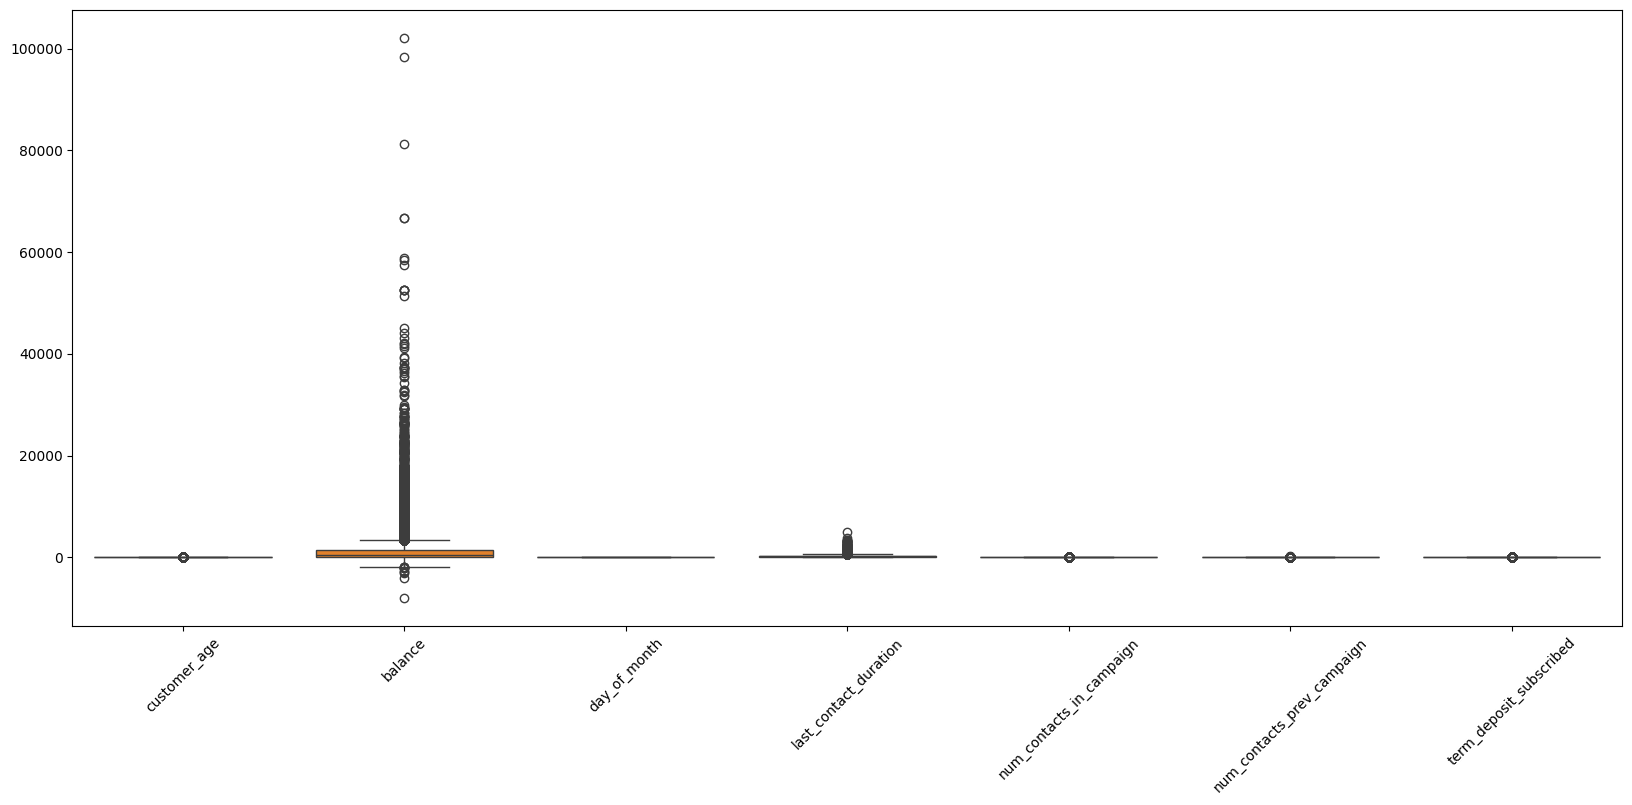

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot(numerical)
plt.xticks(rotation=45)
plt.show()

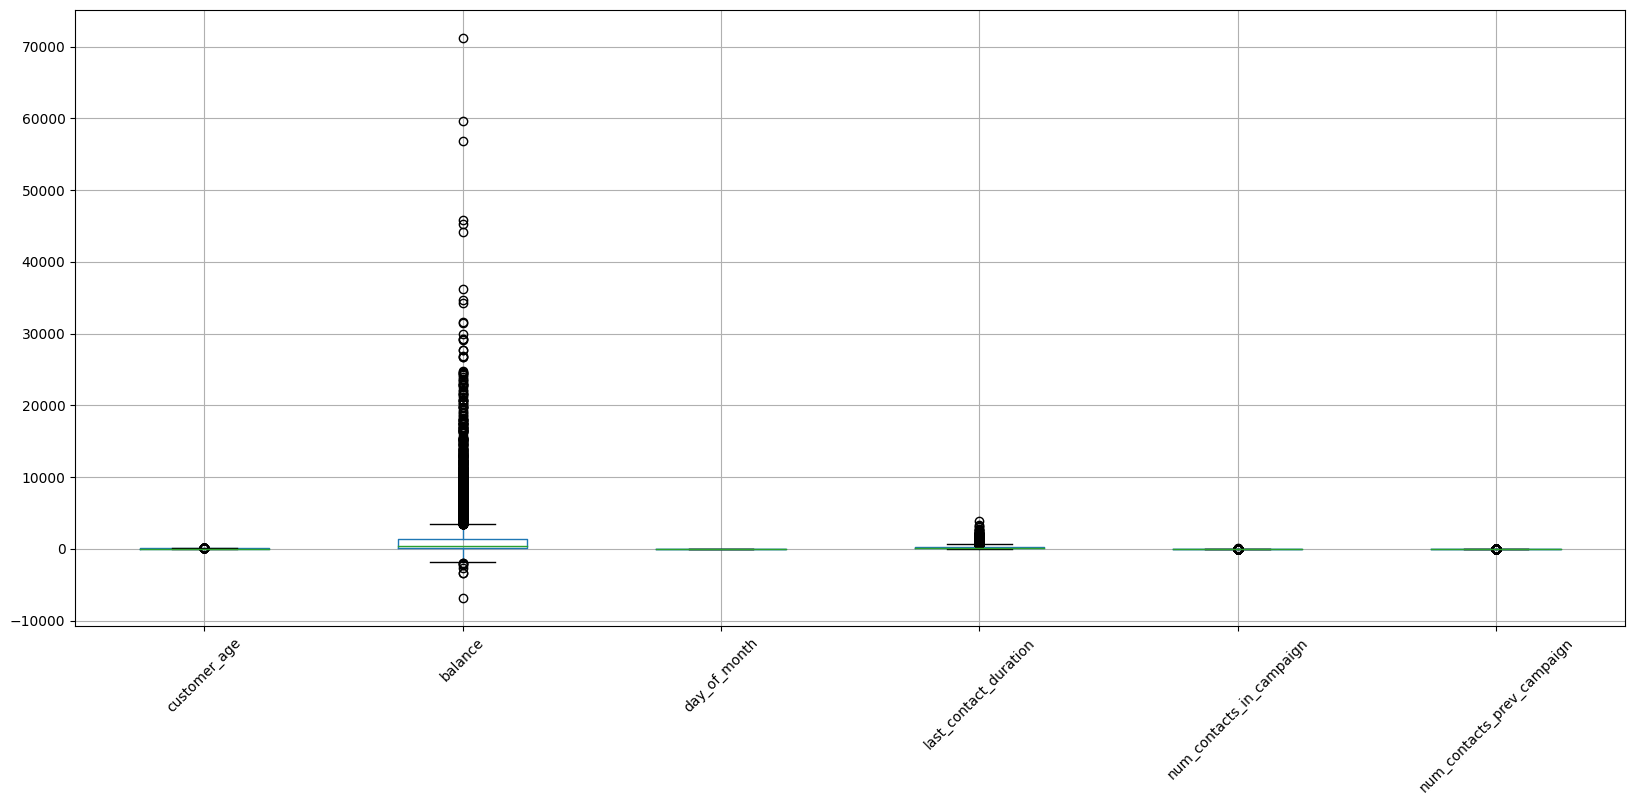

In [20]:
numerical_test.boxplot(figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

In [21]:
num_cols=numerical[['balance']]

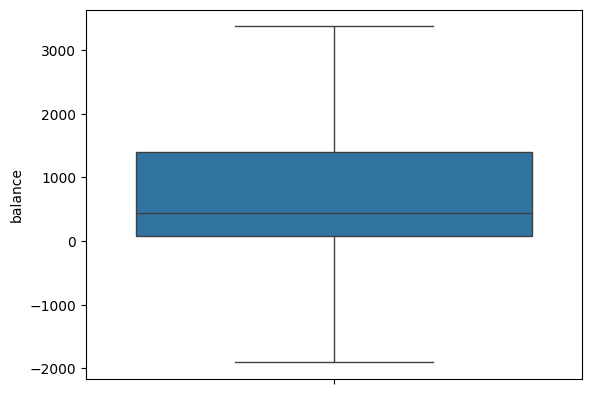

1.0913153890165883




In [22]:
for i in num_cols.columns:
  q1=numerical[i].quantile(0.25)
  q3=numerical[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []
  for h in numerical[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      numerical[i]=numerical[i].clip(lower=low_lim,upper=up_lim)
  sns.boxplot(numerical[i])
  plt.show()
  print(numerical[i].skew())
  print('\n')

In [23]:
num_test=numerical_test[['balance']]

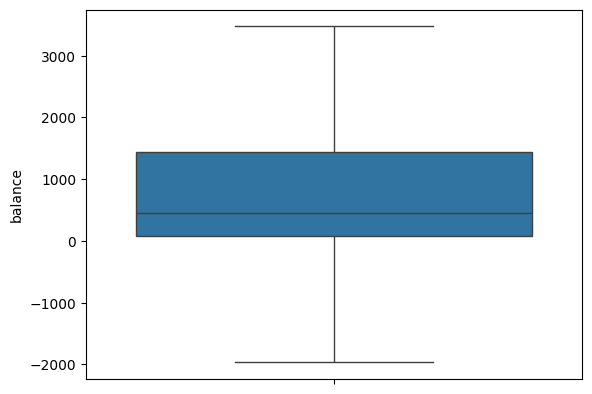

1.1037359119899657




In [24]:
for i in num_test.columns:
  q1=numerical_test[i].quantile(0.25)
  q3=numerical_test[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []
  for h in numerical_test[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      numerical_test[i]=numerical_test[i].clip(lower=low_lim,upper=up_lim)
  sns.boxplot(numerical_test[i])
  plt.show()
  print(numerical_test[i].skew())
  print('\n')

Since only balance has a majority of outliers, only that feature has been used to handle outliers with IQR method.

<Axes: >

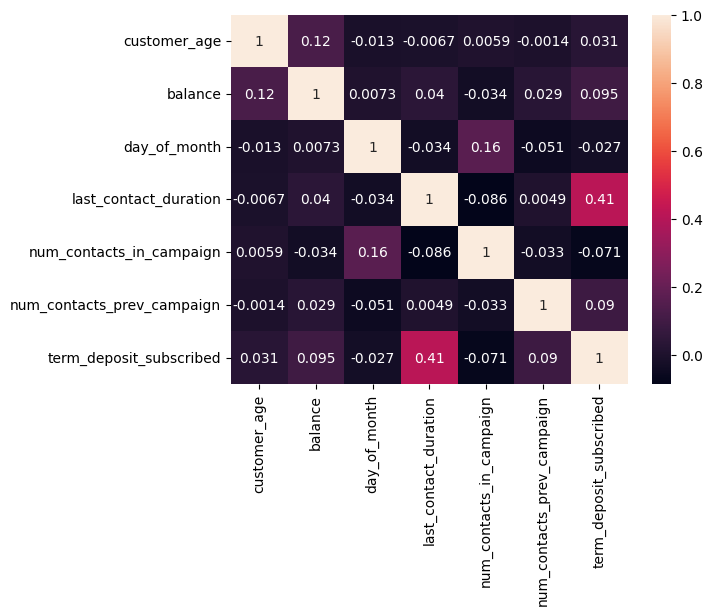

In [25]:
sns.heatmap(numerical.corr(),annot=True)

<Axes: >

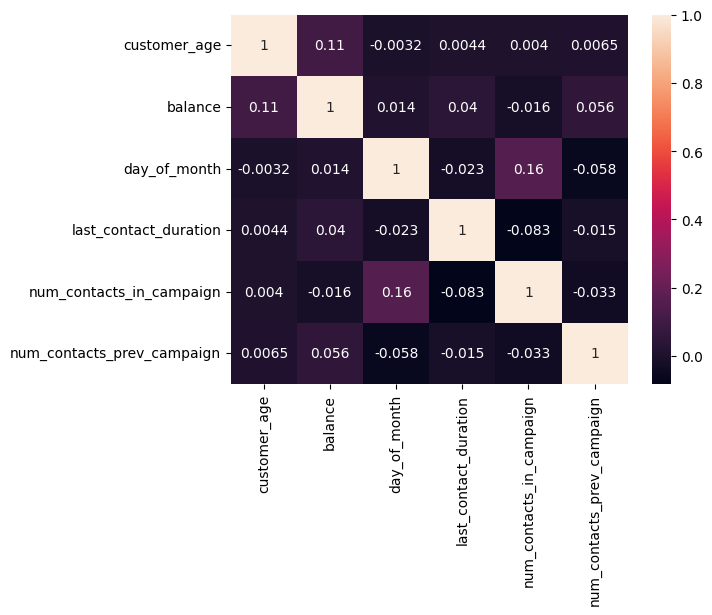

In [26]:
sns.heatmap(numerical_test.corr(),annot=True)

Day of the month seems irrelavant as it represents only a particular date in a month. If it is scaled, it might affect other features.

In [27]:
#dropping day of month since it seems irrelavant and scaling might assign weights as per the values from 1-31
numerical.drop('day_of_month',axis=1,inplace=True)
numerical_test.drop('day_of_month',axis=1,inplace=True)

In [28]:
numerical.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,303.0,4.0,0,0
1,34.0,934.0,143.0,2.0,1,0
2,46.0,656.0,101.0,4.0,0,0
3,34.0,2.0,127.0,3.0,0,0
4,41.0,1352.0,49.0,2.0,0,0


In [29]:
numerical_test.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,55.0,3475.625,90.0,2.0,0
1,24.0,179.000,63.0,2.0,0
2,46.0,143.000,208.0,1.0,0
3,56.0,3475.625,34.0,1.0,0
4,62.0,2913.000,127.0,1.0,1


In [30]:
X=numerical.drop('term_deposit_subscribed',axis=1)

In [31]:
X.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,285.0,303.0,4.0,0
1,34.0,934.0,143.0,2.0,1
2,46.0,656.0,101.0,4.0,0
3,34.0,2.0,127.0,3.0,0
4,41.0,1352.0,49.0,2.0,0


In [32]:
X.skew()

customer_age                   0.676055
balance                        1.091315
last_contact_duration          3.185937
num_contacts_in_campaign       5.009996
num_contacts_prev_campaign    45.833007
dtype: float64

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_mm=mm.fit_transform(X)
X_mm=pd.DataFrame(X_mm, columns=X.columns)

In [34]:
mm=MinMaxScaler()
test_mm=mm.fit_transform(numerical_test)
test_mm=pd.DataFrame(test_mm, columns=numerical_test.columns)

In [35]:
X_mm.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,0.126582,0.414803,0.061837,0.048387,0.000000
1,0.202532,0.537813,0.029184,0.016129,0.003636
2,0.354430,0.485121,0.020612,0.048387,0.000000
3,0.202532,0.361164,0.025918,0.032258,0.000000
4,0.291139,0.617039,0.010000,0.016129,0.000000


In [36]:
test_mm.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,0.486842,1.000000,0.023298,0.020408,0.000000
1,0.078947,0.394114,0.016309,0.020408,0.000000
2,0.368421,0.387498,0.053844,0.000000,0.000000
3,0.500000,1.000000,0.008801,0.000000,0.000000
4,0.578947,0.896595,0.032876,0.000000,0.026316


In [37]:
test_mm.skew()

customer_age                  0.681168
balance                       1.103736
last_contact_duration         3.079672
num_contacts_in_campaign      4.444608
num_contacts_prev_campaign    6.261693
dtype: float64

In [38]:
!pip install yellowbrick

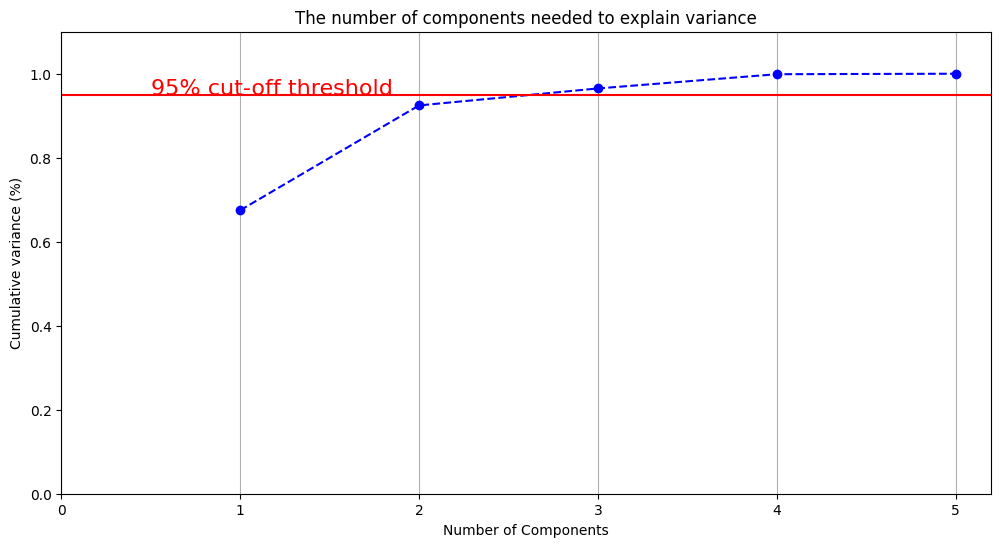

In [39]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_mm)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

In [40]:
pca=PCA(n_components=2)
pca.fit(X_mm)
x_pca1=pca.transform(X_mm)

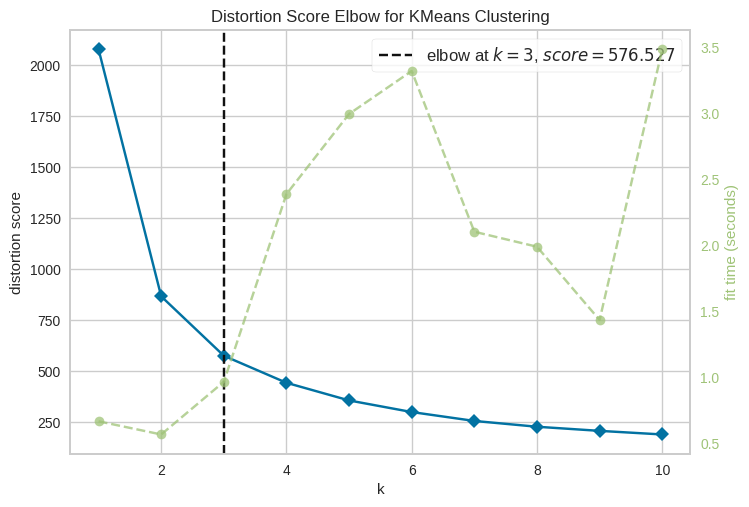

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca1)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(x_pca1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

optimum number of clusters with 2 PCA components- 3

In [42]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca1)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(x_pca1,y_kmeans)
silhouette_score_avg

0.44157807012708966

After PCA, the silhouette score has improved to 0.4415

In [43]:
dtrain['cluster']=kmeans.labels_

In [44]:
dtrain['cluster'].value_counts()

cluster
2    15880
1     9030
0     6737
Name: count, dtype: int64

In [45]:
import plotly.express as px

fig = px.scatter(dtrain, x="customer_age", y = "balance", color='cluster',size_max=60)
fig.update_layout(
     height=800)
fig.show()

**Will use the Test Dataset for PCA**

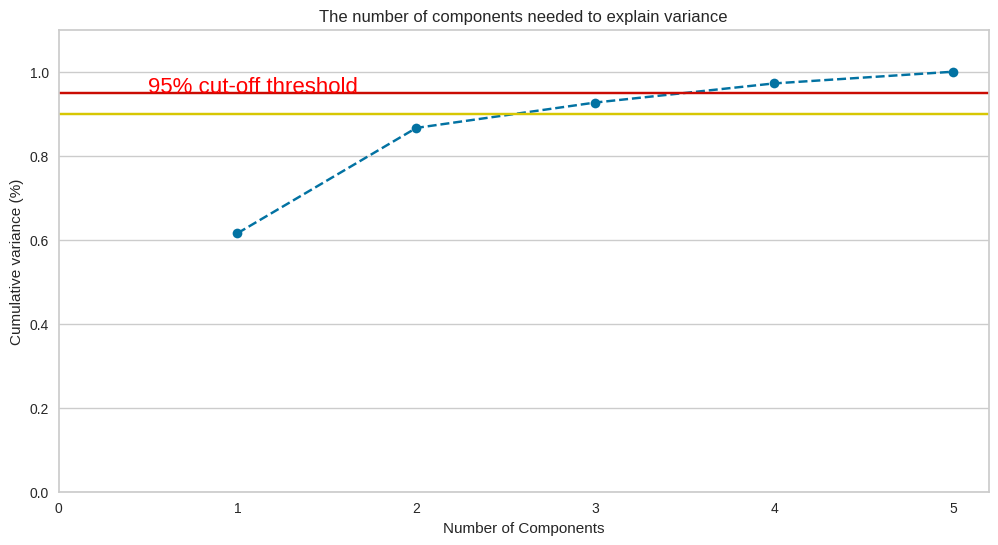

In [49]:
from sklearn.decomposition import PCA
test_pca=PCA().fit(test_mm)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,6, step=1)
y = np.cumsum(test_pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.90, color='y', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

In [50]:
pca=PCA(n_components=2)
pca.fit(test_mm)
x_pca2=pca.transform(test_mm)

In [51]:
x_pca2

array([[ 0.48577323,  0.13639825],
       [-0.16329892, -0.19851489],
       [-0.13569497,  0.08962432],
       ...,
       [-0.1202828 ,  0.07477108],
       [-0.10699977,  0.16583402],
       [-0.08747884,  0.15030624]])

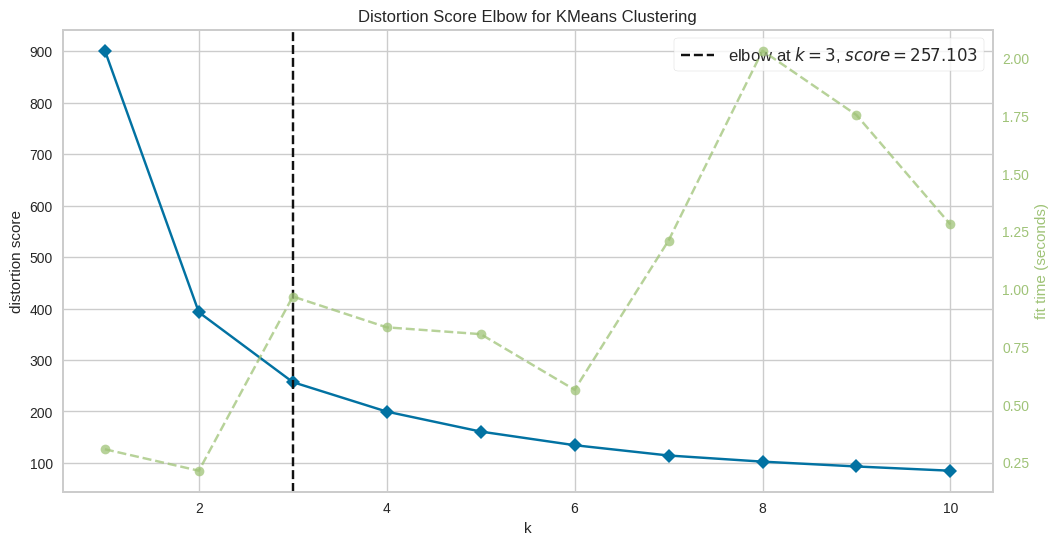

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca2)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(x_pca2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [53]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans1=kmeans.fit_predict(x_pca2)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(x_pca2,y_kmeans1)
silhouette_score_avg

0.4440052261928298

**Test Dataset after PCA has given a silhouette score of 0.444**

In [54]:
dtest['clusters']=kmeans.labels_

In [55]:
dtest['clusters'].value_counts()

clusters
2    6769
0    3922
1    2873
Name: count, dtype: int64

In [56]:
import plotly.express as px

fig = px.scatter(dtest, x="balance", y = "customer_age", color='clusters',size_max=60)
fig.update_layout(
     height=800)
fig.show()